In [143]:
import core.result as cr
from core.result import Result
import core.paths as paths

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [174]:
MODEL_LABELS = {
    'vgg16': 'VGG16',
    'mobilenet_a25': 'MobileNetV1(alpha=0.25)',
    'mobilenet_v2_a35': 'MobileNetV2(alpha=0.35)',
    'resnet50_v2': 'ResNet50V2',
    'inception_v3': 'InceptionV3',
    'inception_resnet_v2': 'InceptionResNetV2',
    'densenet_121': 'DenseNet121',
    'nasnet_mobile': 'NASNetMobile',
    'xception': 'Xception',
}

In [4]:
result = cr.select_result()

-------------------------------- Select Output ---------------------------------
IDX   EXP                  MODEL                INSTANCE            
  0   test                 mobilenet_a25        test                
  1   deep_a0              mobilenet_v2_a35     D00_FINAL           
  2   deep_a0              baseline_model_v1    D00_FINAL           
  3   deep_a0              inception_v3         D00_FINAL           
  4   deep_a0              mobilenet_a25        D00_FINAL_TEST      
  5   deep_a0              mobilenet_a25        D00_FINAL           
  6   deep_a0              vgg16                D00_FINAL_TEST      
  7   deep_a0              vgg16                D00_FINAL           
  8   deep_a0              nasnet_mobile        D00_FINAL           
  9   deep_a0              densenet_121         D00_FINAL           
 10   deep_a0              xception             D00_FINAL           
 11   deep_a0              resnet50_v2          D00_FINAL           
 12   deep_a0         

In [179]:
exp_key = paths.get_exp_key_from_dir()
model_keys = paths.get_model_keys(exp_key)
results = dict()
for key in model_keys:
    results[key] = Result.load(exp_key=exp_key, model_key=key, instance_key='D00_FINAL')

In [180]:
for key, result in results.items():
    results[key] = result
    metric = result.get_auc_f1()['auc_micro']
    print('{:20s}: {}'.format(key, metric))

mobilenet_v2_a35    : 0.8651177772273348
baseline_model_v1   : 0.9053913459424076
inception_v3        : 0.9481998832274714
mobilenet_a25       : 0.9712471343970924
vgg16               : 0.9709721060254118
nasnet_mobile       : 0.8815740627235297
densenet_121        : 0.9702101305223676
xception            : 0.947560414618303
resnet50_v2         : 0.9608115769725584
inception_resnet_v2 : 0.9568305373431976


In [181]:
for key, result in results.items():
    results[key] = result
    metric = result.get_soft_accuracy()
    print('{:20s}: {}'.format(key, metric))

mobilenet_v2_a35    : 0.764308426073132
baseline_model_v1   : 0.8445945945945946
inception_v3        : 0.920906200317965
mobilenet_a25       : 0.9531001589825119
vgg16               : 0.93879173290938
nasnet_mobile       : 0.8048489666136724
densenet_121        : 0.9348171701112877
xception            : 0.9256756756756757
resnet50_v2         : 0.9356120826709062
inception_resnet_v2 : 0.9320349761526232


In [182]:
cm_keys = [
    'vgg16',
    'mobilenet_a25',
    'mobilenet_v2_a35',
    'nasnet_mobile',
]


In [368]:
def plot_confusion_matrix(ax, result, model_key, title_index=None, xlabel=True, ylabel=True, cmap=None):
    classes = ['oap', 'in', 'obs']
    classes_rows = ['obs', 'in', 'oap']
    cm = result.get_confusion_matrix()
    cm = cm.reindex(classes_rows, axis="rows")
    cm = cm.reindex(classes, axis="columns")
    upper_mapper = { cls: cls.upper() for cls in classes }
    cm = cm.rename(index=upper_mapper, columns=upper_mapper)
    
    sns.heatmap(cm, annot=True, ax=ax, fmt="d", cmap=cmap or "Blues")
    ax.set_xlabel("Prediction" if xlabel else None)
    ax.set_ylabel("Ground Truth" if ylabel else None)
    ax.xaxis.tick_top()
    ax.xaxis.set_tick_params(length=0)
    ax.xaxis.set_label_position("top")
    ax.set(ylim=[0, 3], yticks=[0.5, 1.5, 2.5])
    
    title = MODEL_LABELS[model_key]
    if title_index:
        title = "({}) {}".format(title_index, title)
    ax.set_title(title, fontweight="bold", pad=15)

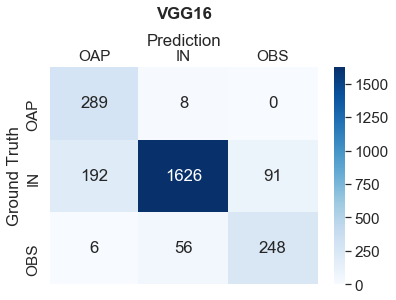

In [369]:
fig, ax = plt.subplots()
key = cm_keys[0]
mob1 = result_by_model[key]
plot_confusion_matrix(ax, results[key], key)

/Users/itsnamgyu/code/cardiac-research/venv/lib/python3.7/site-packages/ipykernel_launcher.py:10: UserWarning: tight_layout : falling back to Agg renderer
  # Remove the CWD from sys.path while we load stuff.


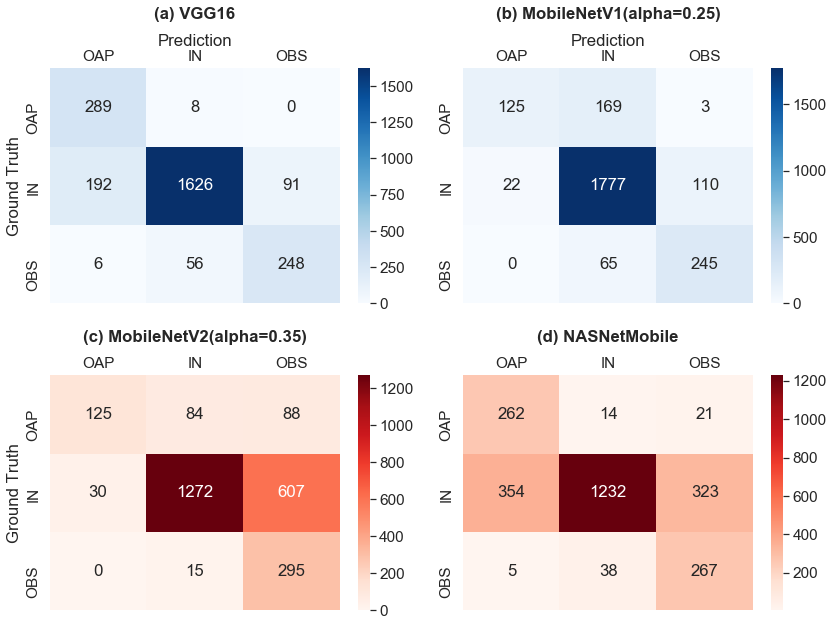

In [376]:
fig = mpl.figure.Figure((12, 9))
axes = fig.subplots(2, 2)
axes = axes.flatten()
for i, key in enumerate(cm_keys):
    left = (i % 2 == 0)
    top = (i // 2 == 0)
    cmap = "Blues" if top else "Reds"
    plot_confusion_matrix(axes[i], results[key], key, title_index=chr(ord('a') + i),
                          xlabel=top, ylabel=left, cmap=cmap)
fig.tight_layout()
fig.savefig('Confusion Matrix.png', dpi=320)
fig

/Users/itsnamgyu/code/cardiac-research/venv/lib/python3.7/site-packages/ipykernel_launcher.py:8: UserWarning: tight_layout : falling back to Agg renderer
  


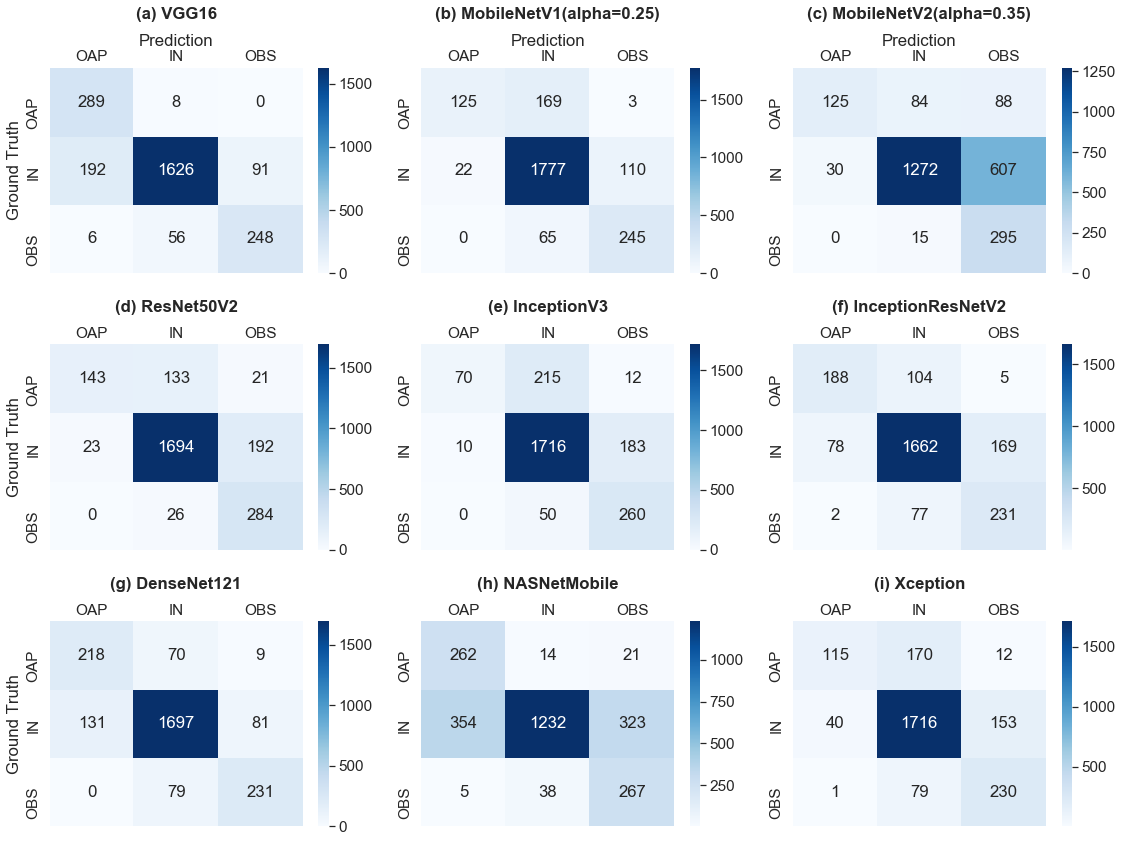

In [377]:
fig = mpl.figure.Figure((16, 12))
axes = fig.subplots(3, 3)
axes = axes.flatten()
for i, key in enumerate(MODEL_LABELS.keys()):
    left = (i % 3 == 0)
    top = (i // 3 == 0)
    plot_confusion_matrix(axes[i], results[key], key, title_index=chr(ord('a') + i), xlabel=top, ylabel=left)
fig.tight_layout()
fig.savefig('Confusion Matrix All.png', dpi=320)
fig